In [4]:
import matplotlib.pyplot as plt
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
import os
import numpy as np
from astropy import units as u


path='/Users/s2537809/MUSE'#specify code directory
os.chdir(path)



filename = 'cube_26.fits'
hdulist = fits.open(filename)  
hdu = hdulist[0]  
wcs = WCS(hdu.header)  
data_cube = hdu.data
print(wcs  )

print(wcs.pixel_n_dim )
print(wcs.world_n_dim  )
print(wcs.array_shape  )
print(hdu.data.shape  )
print(wcs.pixel_shape  ) # keeps the same order as the NAXIS keywords in the header
print(wcs.world_axis_physical_types  )


# could use these as inputs to the pixel_to_world functionn : list(range(1,5)) or [1,2,3,4] or [1]
celestial, spectral = wcs.pixel_to_world(100,100, list(range(0,3722)))  # prints these specific pixel coordinates in si units (can use lists instead of single values)
# this takes values beyond the wcs information - it extends beyond 3722??

print(celestial  )
print(spectral  )

spectral.to(u.AA)  # convert to angstroms

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'AWAV'  
CRVAL : 150.101125  2.31237  4.7003271484375004e-07  
CRPIX : 215.757034655676  193.091925765594  1.0  
CD1_1 CD1_2 CD1_3  : -5.55555555555556e-05  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  5.55555555555556e-05  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.25e-10  
NAXIS : 409  411  3722
3
3
(3722, 411, 409)
(3722, 411, 409)
(409, 411, 3722)
['pos.eq.ra', 'pos.eq.dec', 'em.wl']
<SkyCoord (ICRS): (ra, dec) in deg
    [(150.10750556, 2.30725377), (150.10750556, 2.30725377),
     (150.10750556, 2.30725377), ..., (150.10750556, 2.30725377),
     (150.10750556, 2.30725377), (150.10750556, 2.30725377)]>
[4.70032715e-07 4.70157715e-07 4.70282715e-07 ... 9.34907715e-07
 9.35032715e-07 9.35157715e-07] m


<SpectralCoord 
   (target: <ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
                (150.101125, 2.31237, 1000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>)
  [4700.32714844, 4701.57714844, 4702.82714844, ..., 9349.07714844,
   9350.32714844, 9351.57714844] Angstrom>

(411, 409)


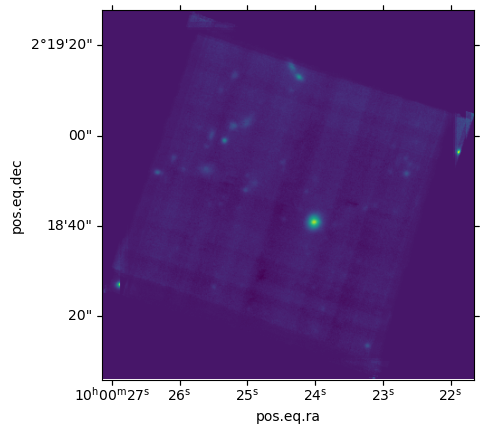

In [25]:
# Select the slices
slices = list(range(0, 1000))

print(data_cube[2].shape)
# Calculate the average of the selected slices
average_slice = np.median(data_cube[slices], axis=0) 
weights = np.random.rand(len(slices))

weighted_average = np.average(data_cube[slices], axis=0, weights=weights)
#print(average_slice)

# Plot a 2d slice averaged over wavelengths 
#plt.imshow(data_cube[100,:,:], origin='lower', cmap='inferno')
plt.subplot(projection=wcs, slices=('x', 'y', 0)) # Don't think setting the slice in z dimension matters here
plt.imshow(weighted_average.transpose()) 
#plt.imshow(average_slice.transpose()) 


(array([ 9.,  9., 10., 10., 10.,  5.,  7.,  9., 13., 18.]),
 array([6.61910392e-05, 9.91767441e-02, 1.98287297e-01, 2.97397850e-01,
        3.96508403e-01, 4.95618956e-01, 5.94729509e-01, 6.93840062e-01,
        7.92950615e-01, 8.92061168e-01, 9.91171721e-01]),
 <BarContainer object of 10 artists>)

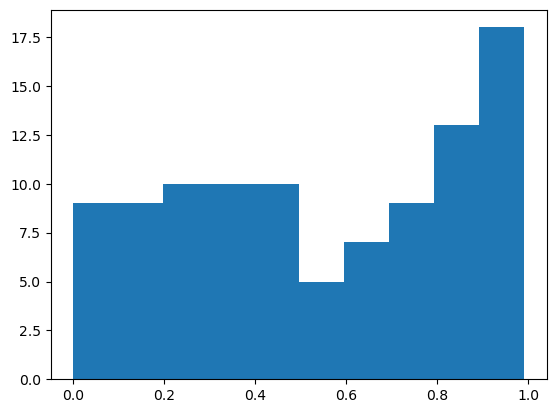

In [6]:
import matplotlib.pyplot as plt
plt.hist(weights)

In [7]:
import numpy as np

with open('HST_WFC3_UVIS2.F606W.dat', 'r') as file:
    HST = file.read()


# Split the data into lines
HST = HST.split('\n')

# Split each line into columns and filter out any lines that don't have 2 columns
rows = [row.split() for row in HST if len(row.split()) == 2]

HST_table = Table(rows=rows, names=['Wavelength', 'Throughput'])

print(HST_table)


# Extract the wavelength values from the table and convert to float
wavelengths = np.array(HST_table['Wavelength'], dtype=float)

#Calculate the differences between consecutive wavelengths
wavelength_diffs = np.diff(wavelengths)

#Calculate the average, smallest, and largest step size
average_step = np.mean(wavelength_diffs)
smallest_step = np.min(wavelength_diffs)
largest_step = np.max(wavelength_diffs)

# Print the results
print("Average step size between wavelengths:", average_step)
print("Smallest step size between wavelengths:", smallest_step)
print("Largest step size between wavelengths:", largest_step)


# Check of matching the bounds of HST to MUSE flips the step size so the resolution works for intepolation 

 Wavelength  Throughput
----------- -----------
4579.000000 6.16977e-05
4580.000000 6.48326e-05
4581.000000  6.7968e-05
4581.283691 6.88576e-05
4582.000000 7.19065e-05
4583.000000 7.61635e-05
4584.000000 8.04211e-05
4585.000000 8.46792e-05
4586.000000 8.89456e-05
4587.000000 9.32053e-05
        ...         ...
7363.000000 6.90451e-05
7364.000000 6.80117e-05
7365.000000 6.69732e-05
7366.000000 6.59413e-05
7367.000000 6.49101e-05
7368.000000  6.3874e-05
7369.000000 6.28443e-05
7370.000000 6.18098e-05
7371.000000 6.07816e-05
7372.000000 5.97488e-05
7372.030273 5.97177e-05
Length = 3074 rows
Average step size between wavelengths: 0.90889367816466
Smallest step size between wavelengths: 0.00048799999967741314
Largest step size between wavelengths: 1.0


In [8]:
import numpy as np
from scipy.interpolate import interp1d


hst_wavelengths = HST_table['Wavelength']

# Interpolating the MUSE data onto the HST wavelengths
muse_wavelengths_interpolated = interp1d(np.arange(len(spectral)), spectral, kind='linear')(np.linspace(0, len(spectral) - 1, len(hst_wavelengths)))
#check the interpolation#
# Now muse_wavelengths_interpolated contains the interpolated MUSE wavelengths that match the wavelength grid of HST data


In [9]:
len(muse_wavelengths_interpolated)

3074

In [10]:
muse_wavelengths_interpolated*u.m.to(u.AA)  # convert to angstroms



array([4700.32714844, 4701.84073451, 4703.35432058, ..., 9348.54997629,
       9350.06356237, 9351.57714844])

(411, 409)


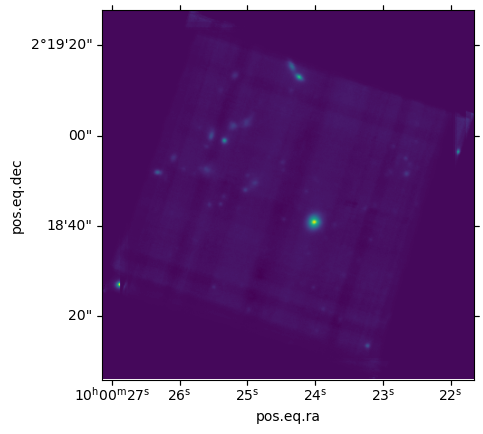

In [11]:
# Select the slices
slices = list(range(0, 3074))

print(data_cube[2].shape)
# Calculate the average of the selected slices
average_slice = np.mean(data_cube[slices], axis=0) 
weights = np.random.rand(len(slices))

weighted_average = np.average(data_cube[slices], axis=0, weights=weights)
#print(average_slice)


# Plot a 2d slice averaged over wavelengths 
#plt.imshow(data_cube[100,:,:], origin='lower', cmap='inferno')
plt.subplot(projection=wcs, slices=('x', 'y', 0)) # Don't think setting the slice in z dimension matters here
plt.imshow(average_slice.transpose()) # not convinced about the axis here

In [31]:
from mpdaf.obj import Cube
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from mpdaf.obj import Image
from scipy import integrate

In [27]:

# data array is read from the file (extension number 0)
cube = Cube(filename='/Users/s2537809/MUSE/cube_26.fits')

# The 3 dimensions of the cube:
print('Shape:', cube.shape)

print('Data Shape:', cube.data.shape)

#cube.var.shape - An optional numpy masked array of pixel variances, clearly not in this cube

print('Mask Shape:',cube.mask.shape)


# These output [k,p,q] where k is lamda 

Shape: (3722, 411, 409)
Data Shape: (3722, 411, 409)
Mask Shape: (3722, 411, 409)


In [30]:
with open('HST_WFC3_UVIS2.F606W.dat', 'r') as file:
    HST = file.read()


# Split the data into lines
HST = HST.split('\n')

# Split each line into columns and filter out any lines that don't have 2 columns
rows = [row.split() for row in HST if len(row.split()) == 2]

HST_table = Table(rows=rows, names=['Wavelength', 'Throughput'])

print(HST_table)


# Extract the wavelength values from the table and convert to float
wavelengths = np.array(HST_table['Wavelength'], dtype=float)

#Calculate the differences between consecutive wavelengths
wavelength_diffs = np.diff(wavelengths)

#Calculate the average, smallest, and largest step size
average_step = np.mean(wavelength_diffs)
smallest_step = np.min(wavelength_diffs)
largest_step = np.max(wavelength_diffs)

# Print the results
print("Average step size between wavelengths:", average_step)
print("Smallest step size between wavelengths:", smallest_step)
print("Largest step size between wavelengths:", largest_step)

 Wavelength  Throughput
----------- -----------
4579.000000 6.16977e-05
4580.000000 6.48326e-05
4581.000000  6.7968e-05
4581.283691 6.88576e-05
4582.000000 7.19065e-05
4583.000000 7.61635e-05
4584.000000 8.04211e-05
4585.000000 8.46792e-05
4586.000000 8.89456e-05
4587.000000 9.32053e-05
        ...         ...
7363.000000 6.90451e-05
7364.000000 6.80117e-05
7365.000000 6.69732e-05
7366.000000 6.59413e-05
7367.000000 6.49101e-05
7368.000000  6.3874e-05
7369.000000 6.28443e-05
7370.000000 6.18098e-05
7371.000000 6.07816e-05
7372.000000 5.97488e-05
7372.030273 5.97177e-05
Length = 3074 rows
Average step size between wavelengths: 0.90889367816466
Smallest step size between wavelengths: 0.00048799999967741314
Largest step size between wavelengths: 1.0


In [ ]:
def image_slice(cube,filter_k,filter_throughput, unit_wave=u.angstrom):
    # check inputs are 1d arrays 

    wavelengths = np.asarray(filter_k, dtype=float)
    sensitivities = np.asarray(filter_throughput, dtype=float)

    if (wavelengths.ndim != 1 or sensitivities.ndim != 1 or
            len(wavelengths) != len(sensitivities)):
        raise ValueError('The filter_k and filter_throughput arguments'
                        ' should be 1D arrays of equal length')
    
    
    #Give a choice to pass wavelength units as pixels not AA 
    
    if unit_wave is None:
        pixels = wavelengths.copy()
    else:
        pixels = cube.wave.pixel(wavelengths, unit=unit_wave) # Obtains the spectral pixel indexes of wavelengths
    
    # Get the integer indexes of the pixels that contain the above
    # floating point pixel indexes. # could just use nearest = True in the above though?
    indexes = np.rint(pixels).astype(int)
    

    # If there is no overlap between the bandpass filter curve and the wavelength coverage of the cube, complain.
    if indexes[0] >= self.shape[0] or indexes[-1] < 0:
        raise ValueError("The filter curve does not overlap the "
                            "wavelength coverage of the cube.")
    
    # limit range of cube/ filter to be the same



    # interpolate across the filter curve 



    # integrate to determine the weights at different k 
            # ignore the masking section for now 



    # Get weighted average image along spectral axis 






## write from the mpdaf orrr write from this function
## check at least how the usm function works 
